In [1]:
import  pandas as pd
import numpy as np
import sklearn.svm as sk

from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import plot_confusion_matrix
#from sklearn.metrics import confusion_matrix

#read the csv file
featuretable= pd.read_csv('/content/all features with label.csv') 
print(featuretable)

featuretable= np.array(featuretable)
Ftotal_45=np.transpose(featuretable)
Ftotal_45= np.delete(Ftotal_45, 0, 0) #remove label of features
Ftotal_45= np.array(Ftotal_45,dtype=np.float)
X= np.delete(Ftotal_45, 48, 1) #remove label from other features
y= Ftotal_45[:, 48] #label of set

#find features with high correlation to remove them
df = pd.DataFrame(X)
print('df.head()=') 
print(df.head())    
# Create correlation matrix
corr_matrix = df.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
# Drop features 
df.drop(to_drop, axis=1, inplace=True)
print()
print('to_drop=')
print(to_drop)

# create dataset
Ftotal=np.transpose(Ftotal_45)
Ftotal= np.delete(Ftotal,[41,42,43,44],1)
Fselect= np.array([Ftotal[4,:],Ftotal[14,:],Ftotal[30,:],Ftotal[33,:],Ftotal[37,:],Ftotal[43,:],Ftotal[44,:],Ftotal[48,:]]) #choosing features+labels as input of SVM
Fselect=np.transpose(Fselect)
X= np.delete(Fselect, [7], 1) #remove label
y= Fselect[:,7] #select label

#print('true')
#print(y)

# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# create model 
model = sk.SVC(kernel='linear') #linear, rbf, or poly
#model = skn.MLPClassifier(activation='logistic') #identity, logistic, relu
#model = skm.RandomForestClassifier() 


#sk.SVC.fit(X,y)
#df= sk.SVC.decision_function(X)
#print('predicted')
#print(df)
#plot_confusion_matrix(model, X, y)

# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) #accuracy , recall, precision
# report performance
print('accuracy: %.5f (%.5f)' % (np.mean(scores), np.std(scores)))


      features            95           100           106           112  \
0         fx_1     21.731400     11.074600      5.834750      3.777310   
1         fx_2     22.215700     12.042800      6.920830      4.017150   
2         fx_3     26.185700     20.578400      6.993340      4.045540   
3         fx_4     27.611400     21.523000      7.797530      4.281230   
4         fx_5     29.351900     44.027300     10.877900      4.476160   
5         fy_1     15.503900     14.723200     15.694200     15.766700   
6         fy_2     15.926400     15.124300     16.121800     16.196300   
7         fy_3     17.451000     16.572200     17.665100     17.746800   
8         fy_4     20.214900     19.196800     20.462900     20.557500   
9         fy_5     29.281100     27.806500     29.640400     29.777400   
10        fz_1     30.723200     30.403200      9.211280      9.955450   
11        fz_2     41.451400     40.121700     10.535400     12.565200   
12        fz_3     53.052900     51.19

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


accuracy: 0.85556 (0.08810)


In [ ]:
import numpy as np
import copy as cp
import matplotlib.pyplot as plt

import seaborn as sns
from typing import Tuple
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

def cross_val_predict(model, kfold :KFold, X : np.array, y : np.array) -> Tuple[np.array, np.array, np.array]:

    model_ = cp.deepcopy(model)
    
    no_classes = len(np.unique(y))
    
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    predicted_proba = np.empty([0, no_classes]) 

    for train_ndx, test_ndx in kfold.split(X):

        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]

        actual_classes = np.append(actual_classes, test_y)

        model_.fit(train_X, train_y)
        predicted_classes = np.append(predicted_classes, model_.predict(test_X))

        try:
            predicted_proba = np.append(predicted_proba, model_.predict_proba(test_X), axis=0)
        except:
            predicted_proba = np.append(predicted_proba, np.zeros((len(test_X), no_classes), dtype=float), axis=0)

    return actual_classes, predicted_classes, predicted_proba

def plot_confusion_matrix(actual_classes : np.array, predicted_classes : np.array):

    matrix = confusion_matrix(actual_classes, predicted_classes)
    
    plt.figure(figsize=(12.8,6))
    sns.heatmap(matrix, annot=True, xticklabels="auto" , yticklabels="auto", cmap="Blues", fmt="g")
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')

    plt.show()


      features            95           100           106           112  \
0         fx_1     21.731400     11.074600      5.834750      3.777310   
1         fx_2     22.215700     12.042800      6.920830      4.017150   
2         fx_3     26.185700     20.578400      6.993340      4.045540   
3         fx_4     27.611400     21.523000      7.797530      4.281230   
4         fx_5     29.351900     44.027300     10.877900      4.476160   
5         fy_1     15.503900     14.723200     15.694200     15.766700   
6         fy_2     15.926400     15.124300     16.121800     16.196300   
7         fy_3     17.451000     16.572200     17.665100     17.746800   
8         fy_4     20.214900     19.196800     20.462900     20.557500   
9         fy_5     29.281100     27.806500     29.640400     29.777400   
10        fz_1     30.723200     30.403200      9.211280      9.955450   
11        fz_2     41.451400     40.121700     10.535400     12.565200   
12        fz_3     53.052900     51.19

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


actual_classes
[1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0.]
predicted_classes
[1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]


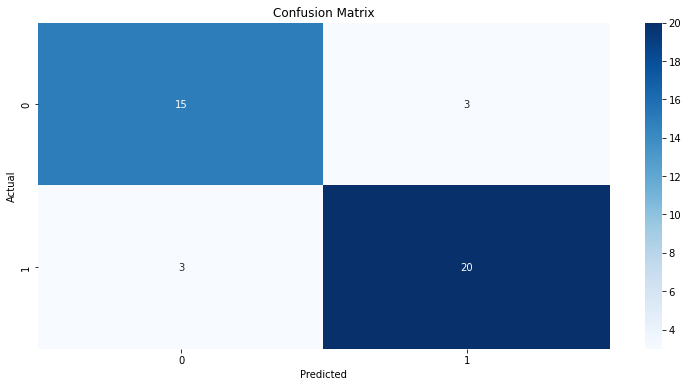

In [ ]:
import  pandas as pd
import numpy as np
import sklearn.svm as sk

from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#read the csv file
featuretable= pd.read_csv('/content/all features with label.csv') 
print(featuretable)

featuretable= np.array(featuretable)
Ftotal_45=np.transpose(featuretable)
Ftotal_45= np.delete(Ftotal_45, 0, 0) #remove label of features
Ftotal_45= np.array(Ftotal_45,dtype=np.float)
X= np.delete(Ftotal_45, 48, 1) #remove label from other features
y= Ftotal_45[:, 48] #label of set

# create dataset
Ftotal=np.transpose(Ftotal_45)
Ftotal= np.delete(Ftotal,[41,42,43,44],1)
Fselect= np.array([Ftotal[4,:],Ftotal[14,:],Ftotal[30,:],Ftotal[33,:],Ftotal[37,:],Ftotal[43,:],Ftotal[44,:],Ftotal[48,:]]) #choosing features+labels as input of SVM
Fselect=np.transpose(Fselect)
X= np.delete(Fselect, [7], 1) #remove label
y= Fselect[:,7] #select label

# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# create model 
model = sk.SVC(kernel='linear') #linear, rbf, or poly

actual_classes, predicted_classes, _ = cross_val_predict(model, cv, X, y)
print('actual_classes')
print(actual_classes)
print('predicted_classes')
print(predicted_classes)
plot_confusion_matrix(actual_classes, predicted_classes)



In [ ]:
#finding pvalue

import  pandas as pd
import numpy as np
import sklearn.svm as sk

from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import permutation_test_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#read the csv file
featuretable= pd.read_csv('/content/all features with label.csv') 
print(featuretable)

featuretable= np.array(featuretable)
Ftotal_45=np.transpose(featuretable)
Ftotal_45= np.delete(Ftotal_45, 0, 0) #remove label of features
Ftotal_45= np.array(Ftotal_45,dtype=np.float)
X= np.delete(Ftotal_45, 48, 1) #remove label from other features
y= Ftotal_45[:, 48] #label of set

# create dataset
Ftotal=np.transpose(Ftotal_45)
Ftotal= np.delete(Ftotal,[41,42,43,44],1)
Fselect= np.array([Ftotal[4,:],Ftotal[14,:],Ftotal[30,:],Ftotal[33,:],Ftotal[37,:],Ftotal[43,:],Ftotal[44,:],Ftotal[48,:]]) #choosing features+labels as input of SVM
Fselect=np.transpose(Fselect)
X= np.delete(Fselect, [7], 1) #remove label
y= Fselect[:,7] #select label

# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# create model 
model = sk.SVC(kernel='linear') #linear, rbf, or poly
#model = skn.MLPClassifier(activation='logistic') #identity, logistic, relu
#model = skm.RandomForestClassifier() 

#finding pvalue
score, permutation_scores, pvalue = permutation_test_score(model, X, y, scoring='accuracy', cv=cv, n_permutations=10)
print('pvalue: %.5f (%.5f)' % (np.mean(pvalue), np.std(pvalue)))

#model.fit(X,y)
#import random
#score = model.score(X,y)
#n_permutations = 1000
#permutation_scores = np.zeros(n_permutations)
#for i in range(n_permutations):
#    y_permuted = random.shuffle(y)
#    permutation_score = model.score(X, y_permuted)
#    permutation_scores[i]=permutation_score

#permutation_scores = np.array(permutation_scores)
#pvalue = (np.sum(permutation_scores >= score) + 1.0) / (n_permutations + 1)
